In [36]:
import numpy as np

In [37]:
P_start = np.matrix([
     [0.25, 0.21, 0.20, 0.16, 0.18],
     [0.15, 0.18, 0.25, 0.17, 0.25],
     [0.19, 0.11, 0.26, 0.30, 0.14],
     [0.15, 0.31, 0.09, 0.20, 0.25],
     [0.15, 0.24, 0.23, 0.21, 0.17],
    ])
P_start

matrix([[0.25, 0.21, 0.2 , 0.16, 0.18],
        [0.15, 0.18, 0.25, 0.17, 0.25],
        [0.19, 0.11, 0.26, 0.3 , 0.14],
        [0.15, 0.31, 0.09, 0.2 , 0.25],
        [0.15, 0.24, 0.23, 0.21, 0.17]])

In [38]:
P_n = P_start ** 100
for i in P_n:
#     print( '%.3f' % i)
    print(i)

[[0.17581363 0.21001646 0.20580668 0.20923887 0.19912436]]
[[0.17581363 0.21001646 0.20580668 0.20923887 0.19912436]]
[[0.17581363 0.21001646 0.20580668 0.20923887 0.19912436]]
[[0.17581363 0.21001646 0.20580668 0.20923887 0.19912436]]
[[0.17581363 0.21001646 0.20580668 0.20923887 0.19912436]]


In [39]:
P = P_start.T - np.eye(5)
P

matrix([[-0.75,  0.15,  0.19,  0.15,  0.15],
        [ 0.21, -0.82,  0.11,  0.31,  0.24],
        [ 0.2 ,  0.25, -0.74,  0.09,  0.23],
        [ 0.16,  0.17,  0.3 , -0.8 ,  0.21],
        [ 0.18,  0.25,  0.14,  0.25, -0.83]])

In [40]:
B = [0, 0, 0, 0, 0, 1]
N = [1, 1, 1, 1, 1]
D = [[0], [0], [0], [0], [0], [0]]

P = np.vstack([P, N])
P = np.hstack([P, D])
P

matrix([[-0.75,  0.15,  0.19,  0.15,  0.15,  0.  ],
        [ 0.21, -0.82,  0.11,  0.31,  0.24,  0.  ],
        [ 0.2 ,  0.25, -0.74,  0.09,  0.23,  0.  ],
        [ 0.16,  0.17,  0.3 , -0.8 ,  0.21,  0.  ],
        [ 0.18,  0.25,  0.14,  0.25, -0.83,  0.  ],
        [ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  0.  ]])

In [41]:
solution = np.linalg.lstsq(P, B)

solution

c:\temp\ipykernel_8816\847338335.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  solution = np.linalg.lstsq(P, B)


(array([0.17581363, 0.21001646, 0.20580668, 0.20923887, 0.19912436,
        0.        ]),
 array([], dtype=float64),
 5,
 array([2.23699926, 1.07309596, 1.05275773, 0.94831603, 0.88921159,
        0.        ]))

In [42]:
solution[0].sum()

1.0000000000000004

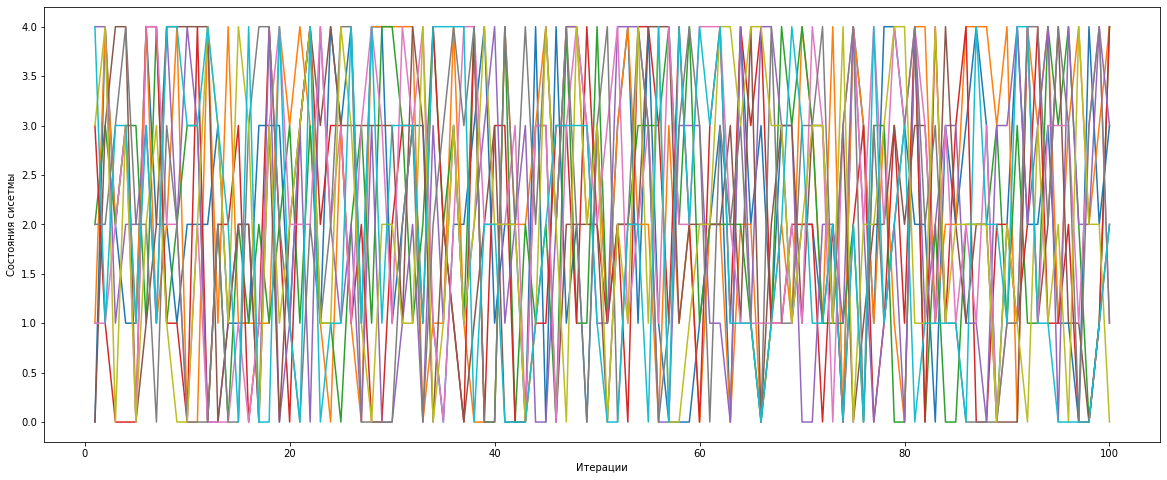

{0: 351, 1: 403, 2: 424, 3: 391, 4: 431}
[0.1755, 0.2015, 0.212, 0.1955, 0.2155] 1.0
[9.83638722767297e-08, 7.2530032762174e-05, 3.8357232178548454e-05, 0.00018875661925554188, 0.00026816151071771817]


In [79]:
from random import randrange, choices
from matplotlib import pyplot as plt

visited_points = []
plt.figure(figsize=(20,8))
plt.ylabel("Состояния сисетмы")
plt.xlabel("Итерации")

freq = {
        0 : 0,
        1 : 0,
        2 : 0,
        3 : 0,
        4 : 0,
       }

points = [0, 1, 2, 3, 4]

for i in range(0, 20):
#     start = randrange(0, 5)
    start = points[i % 5]
    current_point = start
    for y in range(0, 100):
        visited_points.append(current_point)
        current_point = choices([i for i in range(0, 5)], weights=P_start[current_point].tolist()[0][:], k=1)[0]
        freq[current_point] = freq[current_point] + 1
    if i < 10:
        plt.plot([t for t in range(1, 101)], visited_points)
    visited_points.clear()

plt.savefig('Markov_fig')
plt.show()

print(freq)
freq = [freq[i] / 2000 for i in range(0, 5)]

print(freq, sum(freq))
print( [float(i) for i in (solution[0][:-1] - freq) ** 2])
        
    